<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">افزایش داده ها  (data augmentation)</div></center></h1>

In [1]:
import os 
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# The directory where we will
# store our smaller dataset
base_dir = r'C:\Users\MHS\Documents\AI\my-code\dataset\CatVsDog'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')


In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [4]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">   برای درک بهتر نگاهی به تصاویر augment شده می اندازیم:
 </div>


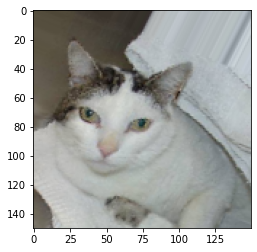

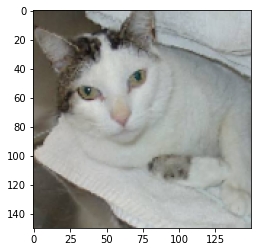

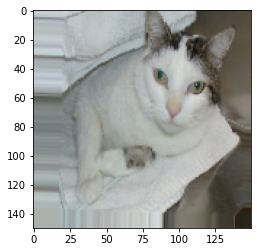

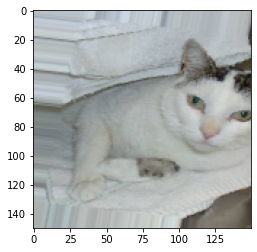

In [5]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array 


fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[9]

img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    
    imgplot = plt.imshow(batch[0].astype('int'))
    i += 1
    if i % 4 == 0:
        break

In [6]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100


C:\Users\MHS\AppData\Local\Temp\ipykernel_21904\1164194086.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 20s 129ms/step - loss: 0.6941 - acc: 0.5140 - val_loss: 0.6970 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 11s 112ms/step - loss: 0.6816 - acc: 0.5600 - val_loss: 0.7212 - val_acc: 0.5020
Epoch 3/100
100/100 [==============================] - 12s 116ms/step - loss: 0.6726 - acc: 0.5585 - val_loss: 0.6725 - val_acc: 0.5680
Epoch 4/100
100/100 [==============================] - 11s 115ms/step - loss: 0.6598 - acc: 0.5895 - val_loss: 0.6370 - val_acc: 0.6280
Epoch 5/100
100/100 [==============================] - 12s 120ms/step - loss: 0.6504 - acc: 0.5995 - val_loss: 0.6305 - val_acc: 0.6360
Epoch 6/100
100/100 [==============================] - 11s 112ms/step - loss: 0.6298 - acc: 0.6320 - val_loss: 0.6129 - val_acc: 0.6510
Epoch 7/100
100/100 [==============================] - 11s 112ms/step - loss: 0.6247 - acc: 0.6485 - val_loss: 0.6226 - val_acc: 0.6240
Epoch 8/100
100/100 [==============================] - 11s 1

Epoch 61/100
100/100 [==============================] - 12s 118ms/step - loss: 0.4440 - acc: 0.7980 - val_loss: 0.4332 - val_acc: 0.7860
Epoch 62/100
100/100 [==============================] - 12s 123ms/step - loss: 0.4334 - acc: 0.8025 - val_loss: 0.4276 - val_acc: 0.7870
Epoch 63/100
100/100 [==============================] - 12s 123ms/step - loss: 0.4424 - acc: 0.7970 - val_loss: 0.4279 - val_acc: 0.7950
Epoch 64/100
100/100 [==============================] - 12s 124ms/step - loss: 0.4275 - acc: 0.8035 - val_loss: 0.4607 - val_acc: 0.7830
Epoch 65/100
100/100 [==============================] - 12s 123ms/step - loss: 0.4389 - acc: 0.7880 - val_loss: 0.5286 - val_acc: 0.7430
Epoch 66/100
100/100 [==============================] - 12s 123ms/step - loss: 0.4156 - acc: 0.8110 - val_loss: 0.5721 - val_acc: 0.7530
Epoch 67/100
100/100 [==============================] - 13s 130ms/step - loss: 0.4358 - acc: 0.8060 - val_loss: 0.4467 - val_acc: 0.8040
Epoch 68/100
100/100 [===================

In [10]:
model.save('cats_and_dogs_small_aug.h5')

 <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">  
     اگر در هنگام اجرای کد بالا خطای dnn library not found پیش اومد 
    ابتدا باید cuda toollit را نصب کنید و بعد از cuDNN را نصب کنید
 </div>
 
 [cuDNN installation](https://docs.nvidia.com/deeplearning/cudnn/install-guide/index.html)

[youtube cuDnn installation](https://www.youtube.com/watch?v=2TcnIzJ1RQs)

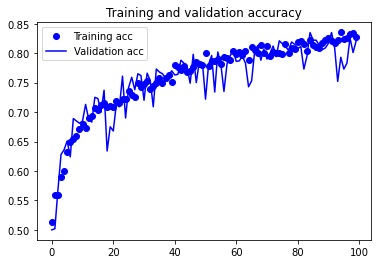

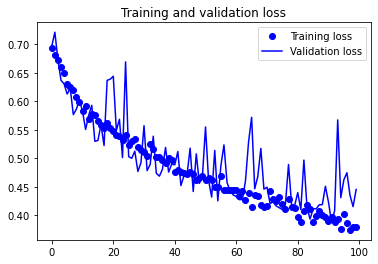

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()